In [46]:
import pickle
import pandas as pd
import numpy as np

In [2]:
with open('models.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
models = data['models']

In [15]:
test = data['test']

In [92]:
def getk(key, data=None, k=1):
    if data is None:
        data = test[key].values.reshape(1, -1)
    dist, _ = models[key].kneighbors(data, n_neighbors=k)
    return dist

In [77]:
df = pd.DataFrame(distances, index=['distance']).T

In [78]:
df['score'] = 1.01**(-df['distance'])

In [86]:
orig_df = pd.read_hdf('../msd.h5')

In [87]:
orig_df = orig_df.drop('track_id', axis=1).dropna()

In [99]:
from multiprocessing import Pool

In [109]:
distances = []

n_keys = len(models)

def work(k):
    return {'test': getk(k)[0, 0], 'average': getk(k, data=orig_df.values)[:,0].mean()}
    
with Pool(processes=8) as pool:
    for i, v in enumerate(pool.imap_unordered(work, models.keys())):
        distances.append(v)
        if (i+1) % 1 == 0:
            print(f'{i+1}/{n_keys}', end='\r')
    

In [112]:
dist = pd.DataFrame(distances)


In [113]:
dist.to_hdf('distances.h5', 'data')

In [123]:
score = 0.5 + np.tanh((dist['average'] - dist['test'])/10) / 2

In [130]:
%matplotlib inline
from matplotlib import pyplot as plt

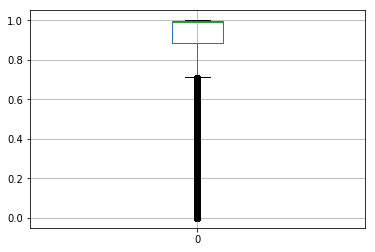

In [134]:
pd.DataFrame(score).boxplot()